In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import tensorflow 
from tensorflow.keras.models import Model 
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.model_selection import train_test_split 

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] =False

In [2]:
train = pd.read_csv('../UCR_TS_Archive_2015/UCR_TS_Archive_2015/ECG5000/ECG5000_TRAIN', header=None)

In [3]:
train

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-0.112520,-2.82720,-3.7739,-4.3498,-4.3760,-3.4750,-2.1814,-1.81830,-1.25050,...,0.160350,0.792170,0.933540,0.79696,0.578620,0.25774,0.22808,0.123430,0.925290,0.193140
1,1,-1.100900,-3.99680,-4.2858,-4.5066,-4.0224,-3.2344,-1.5661,-0.99226,-0.75468,...,0.560330,0.538360,0.656880,0.78749,0.724050,0.55578,0.47633,0.773820,1.119600,-1.436200
2,1,-0.567090,-2.59350,-3.8742,-4.5841,-4.1874,-3.1515,-1.7429,-1.49070,-1.18360,...,1.284800,0.886070,0.531450,0.31138,-0.021919,-0.71368,-0.53220,0.321100,0.904230,-0.421800
3,1,0.490470,-1.91440,-3.6164,-4.3188,-4.2680,-3.8811,-2.9933,-1.67110,-1.33390,...,0.491170,0.350820,0.499110,0.60034,0.842070,0.95207,0.99013,1.086800,1.403000,-0.383560
4,1,0.800230,-0.87425,-2.3848,-3.9733,-4.3382,-3.8024,-2.5345,-1.78340,-1.59450,...,0.966610,1.148900,0.958430,1.05900,1.371700,1.27740,0.96030,0.971020,1.614400,1.421500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,-0.478580,-1.78000,-2.3982,-3.1701,-3.5597,-3.5740,-2.9898,-2.27060,-1.68830,...,1.294800,1.160900,1.456300,2.20940,2.507200,2.19850,1.70580,1.492600,1.561900,1.520200
496,4,-1.325200,-2.48100,-2.9654,-3.3424,-3.1764,-2.8915,-2.3697,-1.59880,-1.07180,...,0.552080,-0.172150,-0.864800,-1.54990,-2.460200,-3.36660,-3.46650,-2.718400,-1.855200,-1.540000
497,4,-0.021964,-0.91243,-1.9034,-2.6628,-3.1222,-3.4515,-3.3930,-2.92990,-2.25630,...,1.528700,1.339500,1.458000,2.12810,2.630800,2.29570,1.76500,1.444300,1.432300,1.457000
498,5,0.288010,-1.09800,-2.5002,-3.5986,-3.6506,-3.2816,-2.2316,-1.25070,-1.07260,...,0.081634,-0.029242,0.071414,0.11816,-0.071967,-0.17121,0.13121,0.049872,0.010915,-0.081534


In [11]:
test= pd.read_csv('../UCR_TS_Archive_2015/UCR_TS_Archive_2015/ECG5000/ECG5000_TEST', header=None)
test

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,3.69080,0.71141,-2.11410,-4.1410,-4.5745,-3.4319,-1.9508,-1.10710,-0.63232,...,-0.032477,0.022847,0.18894,0.48093,0.62925,0.57729,0.66553,1.03600,1.49230,-1.905100
1,1,-1.34810,-3.99600,-4.22670,-4.2512,-3.4780,-2.2284,-1.8085,-1.53420,-0.77986,...,0.937980,1.570900,1.59140,1.54920,1.19310,0.51513,0.12627,0.26753,1.07110,-1.164000
2,1,1.02430,-0.59031,-1.91690,-2.8070,-3.5279,-3.6387,-2.7798,-2.01900,-1.98080,...,0.368820,0.443500,0.82758,1.23700,1.23510,1.73810,1.80080,1.81630,1.47400,1.389800
3,1,0.54566,-1.01440,-2.31670,-3.6340,-4.1969,-3.7581,-3.1944,-2.22180,-1.58860,...,0.894640,0.777530,1.11920,0.90298,0.55410,0.49705,0.41812,0.70311,1.06460,-0.044853
4,1,0.66113,-1.55250,-3.12460,-4.3134,-4.0170,-3.0060,-1.8324,-1.50390,-1.07170,...,1.416600,1.280800,1.49430,1.61880,1.44740,1.23860,1.74970,1.98680,1.42280,-0.357780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4,-1.12300,-2.25290,-2.86760,-3.3586,-3.1678,-2.6384,-1.6642,-0.93566,-0.86695,...,0.205540,-0.472420,-1.31010,-2.02950,-3.22130,-4.17680,-4.00970,-2.87410,-2.00840,-1.808300
4496,2,-0.54770,-1.88950,-2.83980,-3.4579,-3.9291,-3.9660,-3.4926,-2.69530,-1.84970,...,1.218200,1.258400,1.90750,2.28090,1.89520,1.43770,1.19340,1.26130,1.15040,0.804930
4497,2,-1.35180,-2.20900,-2.52020,-3.0615,-3.0651,-3.0307,-2.6227,-2.04410,-1.29590,...,-0.896570,-1.512200,-2.07610,-2.58600,-3.32280,-3.62730,-3.43700,-2.26000,-1.57780,-0.684530
4498,2,-1.12440,-1.90500,-2.19270,-2.9043,-2.9007,-2.7613,-2.5697,-2.04390,-1.49050,...,-2.496000,-2.821800,-3.26840,-3.63500,-3.16880,-2.24590,-1.26230,-0.44331,-0.55977,0.108570


In [12]:
df = pd.concat([train,test], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-0.11252,-2.82720,-3.77390,-4.3498,-4.3760,-3.4750,-2.1814,-1.81830,-1.25050,...,0.16035,0.79217,0.93354,0.79696,0.578620,0.25774,0.22808,0.12343,0.92529,0.19314
1,1,-1.10090,-3.99680,-4.28580,-4.5066,-4.0224,-3.2344,-1.5661,-0.99226,-0.75468,...,0.56033,0.53836,0.65688,0.78749,0.724050,0.55578,0.47633,0.77382,1.11960,-1.43620
2,1,-0.56709,-2.59350,-3.87420,-4.5841,-4.1874,-3.1515,-1.7429,-1.49070,-1.18360,...,1.28480,0.88607,0.53145,0.31138,-0.021919,-0.71368,-0.53220,0.32110,0.90423,-0.42180
3,1,0.49047,-1.91440,-3.61640,-4.3188,-4.2680,-3.8811,-2.9933,-1.67110,-1.33390,...,0.49117,0.35082,0.49911,0.60034,0.842070,0.95207,0.99013,1.08680,1.40300,-0.38356
4,1,0.80023,-0.87425,-2.38480,-3.9733,-4.3382,-3.8024,-2.5345,-1.78340,-1.59450,...,0.96661,1.14890,0.95843,1.05900,1.371700,1.27740,0.96030,0.97102,1.61440,1.42150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,-1.12300,-2.25290,-2.86760,-3.3586,-3.1678,-2.6384,-1.6642,-0.93566,-0.86695,...,0.20554,-0.47242,-1.31010,-2.02950,-3.221300,-4.17680,-4.00970,-2.87410,-2.00840,-1.80830
4996,2,-0.54770,-1.88950,-2.83980,-3.4579,-3.9291,-3.9660,-3.4926,-2.69530,-1.84970,...,1.21820,1.25840,1.90750,2.28090,1.895200,1.43770,1.19340,1.26130,1.15040,0.80493
4997,2,-1.35180,-2.20900,-2.52020,-3.0615,-3.0651,-3.0307,-2.6227,-2.04410,-1.29590,...,-0.89657,-1.51220,-2.07610,-2.58600,-3.322800,-3.62730,-3.43700,-2.26000,-1.57780,-0.68453
4998,2,-1.12440,-1.90500,-2.19270,-2.9043,-2.9007,-2.7613,-2.5697,-2.04390,-1.49050,...,-2.49600,-2.82180,-3.26840,-3.63500,-3.168800,-2.24590,-1.26230,-0.44331,-0.55977,0.10857


Value 1 means normal activity while other 2,3,4,5 means abnormal activity of heart (on column 0)

In [13]:
df =df.add_prefix('c')
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
0,1,-0.11252,-2.82720,-3.77390,-4.3498,-4.3760,-3.4750,-2.1814,-1.81830,-1.25050,...,0.16035,0.79217,0.93354,0.79696,0.578620,0.25774,0.22808,0.12343,0.92529,0.19314
1,1,-1.10090,-3.99680,-4.28580,-4.5066,-4.0224,-3.2344,-1.5661,-0.99226,-0.75468,...,0.56033,0.53836,0.65688,0.78749,0.724050,0.55578,0.47633,0.77382,1.11960,-1.43620
2,1,-0.56709,-2.59350,-3.87420,-4.5841,-4.1874,-3.1515,-1.7429,-1.49070,-1.18360,...,1.28480,0.88607,0.53145,0.31138,-0.021919,-0.71368,-0.53220,0.32110,0.90423,-0.42180
3,1,0.49047,-1.91440,-3.61640,-4.3188,-4.2680,-3.8811,-2.9933,-1.67110,-1.33390,...,0.49117,0.35082,0.49911,0.60034,0.842070,0.95207,0.99013,1.08680,1.40300,-0.38356
4,1,0.80023,-0.87425,-2.38480,-3.9733,-4.3382,-3.8024,-2.5345,-1.78340,-1.59450,...,0.96661,1.14890,0.95843,1.05900,1.371700,1.27740,0.96030,0.97102,1.61440,1.42150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,-1.12300,-2.25290,-2.86760,-3.3586,-3.1678,-2.6384,-1.6642,-0.93566,-0.86695,...,0.20554,-0.47242,-1.31010,-2.02950,-3.221300,-4.17680,-4.00970,-2.87410,-2.00840,-1.80830
4996,2,-0.54770,-1.88950,-2.83980,-3.4579,-3.9291,-3.9660,-3.4926,-2.69530,-1.84970,...,1.21820,1.25840,1.90750,2.28090,1.895200,1.43770,1.19340,1.26130,1.15040,0.80493
4997,2,-1.35180,-2.20900,-2.52020,-3.0615,-3.0651,-3.0307,-2.6227,-2.04410,-1.29590,...,-0.89657,-1.51220,-2.07610,-2.58600,-3.322800,-3.62730,-3.43700,-2.26000,-1.57780,-0.68453
4998,2,-1.12440,-1.90500,-2.19270,-2.9043,-2.9007,-2.7613,-2.5697,-2.04390,-1.49050,...,-2.49600,-2.82180,-3.26840,-3.63500,-3.168800,-2.24590,-1.26230,-0.44331,-0.55977,0.10857


In [14]:
df['c0'].value_counts()

c0
1    2919
2    1767
4     194
3      96
5      24
Name: count, dtype: int64

In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1],test_size=0.2,random_state=42)

In [19]:
train_data

array([[ 2.     , -0.11173, -0.46498, ..., -4.4274 , -5.2936 , -3.7814 ],
       [ 2.     , -0.10688, -0.53675, ..., -3.0855 , -3.2976 , -3.0241 ],
       [ 1.     , -2.5369 , -4.4601 , ...,  0.98888,  1.408  ,  0.88475],
       ...,
       [ 1.     , -1.0321 , -2.8119 , ...,  1.568  ,  1.7765 ,  0.75067],
       [ 2.     , -1.5925 , -2.4614 , ..., -1.0777 , -0.70754,  0.35402],
       [ 1.     , -1.9456 , -3.8405 , ...,  0.95198,  0.88315, -1.366  ]])

In [20]:
train_labels

array([[2.],
       [2.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

In [25]:
test_data , test_data.shape

(array([[ 1.     ,  1.4698 , -1.0485 , ...,  1.9155 ,  1.6721 , -1.0399 ],
        [ 1.     , -1.9986 , -3.7706 , ...,  1.0895 ,  1.4654 ,  0.79952],
        [ 1.     , -1.1878 , -3.365  , ...,  0.93236,  1.2163 , -0.82449],
        ...,
        [ 2.     , -1.3369 , -1.6389 , ..., -0.97652, -1.766  , -0.46729],
        [ 1.     , -0.85346, -3.7171 , ...,  1.5532 ,  1.8897 , -0.67466],
        [ 1.     , -0.71267, -3.1175 , ...,  2.0889 ,  1.7972 , -0.71617]]),
 (1000, 141))

In [24]:
test_labels.shape

(1000, 1)

In [26]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [27]:
train_scaled

array([[0.25      , 0.53813348, 0.59585681, ..., 0.1177566 , 0.05698125,
        0.17124267],
       [0.25      , 0.5385746 , 0.58850378, ..., 0.26561622, 0.25063792,
        0.22736266],
       [0.        , 0.31755921, 0.18654591, ..., 0.71455898, 0.70718645,
        0.51702941],
       ...,
       [0.        , 0.45442391, 0.35540848, ..., 0.77837034, 0.7429392 ,
        0.50709337],
       [0.25      , 0.40345436, 0.39131816, ..., 0.48684921, 0.50193172,
        0.47769947],
       [0.        , 0.37133918, 0.25002561, ..., 0.71049309, 0.65626425,
        0.35023677]])

In [28]:
normal_train_data = pd.DataFrame(train_scaled).add_prefix('c').query('c0 ==0').values[:,1:]
anamoly_train_data = pd.DataFrame(train_scaled).add_prefix('c').query('c0 >0').values[:,1:]

In [29]:
normal_train_data

array([[0.31755921, 0.18654591, 0.09989802, ..., 0.71455898, 0.70718645,
        0.51702941],
       [0.31703169, 0.20003893, 0.11037025, ..., 0.7241915 , 0.62361719,
        0.33544534],
       [0.33406701, 0.24873471, 0.16145016, ..., 0.65250399, 0.64663866,
        0.42571234],
       ...,
       [0.47703005, 0.36819458, 0.13328888, ..., 0.56346097, 0.60566126,
        0.47436103],
       [0.45442391, 0.35540848, 0.20183558, ..., 0.77837034, 0.7429392 ,
        0.50709337],
       [0.37133918, 0.25002561, 0.14875536, ..., 0.71049309, 0.65626425,
        0.35023677]])

In [30]:
anamoly_train_data

array([[0.53813348, 0.59585681, 0.57441298, ..., 0.1177566 , 0.05698125,
        0.17124267],
       [0.5385746 , 0.58850378, 0.54123   , ..., 0.26561622, 0.25063792,
        0.22736266],
       [0.49970441, 0.50931295, 0.45316912, ..., 0.24557325, 0.15067576,
        0.24355469],
       ...,
       [0.5256594 , 0.50554269, 0.42847244, ..., 0.36632692, 0.43662983,
        0.42344101],
       [0.52216593, 0.52064422, 0.46655685, ..., 0.37646411, 0.44375127,
        0.45707758],
       [0.40345436, 0.39131816, 0.34102081, ..., 0.48684921, 0.50193172,
        0.47769947]])

In [31]:
normal_test_data = pd.DataFrame(test_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anamoly_test_data = pd.DataFrame(test_scaled).add_prefix('c').query('c0 >0').values[:,1:]

In [32]:
normal_test_data

array([[0.68197693, 0.5360736 , 0.22723826, ..., 0.81666024, 0.73281006,
        0.37440253],
       [0.36651872, 0.25718706, 0.11314193, ..., 0.72564597, 0.71275553,
        0.51071341],
       [0.44026267, 0.29874188, 0.18784646, ..., 0.70833122, 0.68858726,
        0.39036556],
       ...,
       [0.42715647, 0.3126857 , 0.14135551, ..., 0.62309074, 0.41803064,
        0.1704868 ],
       [0.47067159, 0.26266828, 0.06505596, ..., 0.77673957, 0.75392213,
        0.40146877],
       [0.48347673, 0.32409893, 0.14906914, ..., 0.83576662, 0.74494756,
        0.39839265]])

In [33]:
anamoly_test_data

array([[0.51907811, 0.49377087, 0.36169072, ..., 0.34574404, 0.31819461,
        0.29595459],
       [0.46240677, 0.40523124, 0.23176184, ..., 0.61483224, 0.61860501,
        0.47566232],
       [0.5751246 , 0.5767125 , 0.49913712, ..., 0.30349843, 0.34005375,
        0.38696635],
       ...,
       [0.47974042, 0.48481651, 0.4292961 , ..., 0.25922539, 0.3368132 ,
        0.3993412 ],
       [0.50591643, 0.49287954, 0.43189781, ..., 0.33851578, 0.42364824,
        0.44398524],
       [0.42670171, 0.47558552, 0.52433061, ..., 0.49799791, 0.3992374 ,
        0.416836  ]])

In [37]:
normal_train_data.shape, normal_test_data.shape

((2333, 140), (586, 140))

In [38]:
anamoly_train_data.shape, anamoly_test_data.shape

((1667, 140), (414, 140))

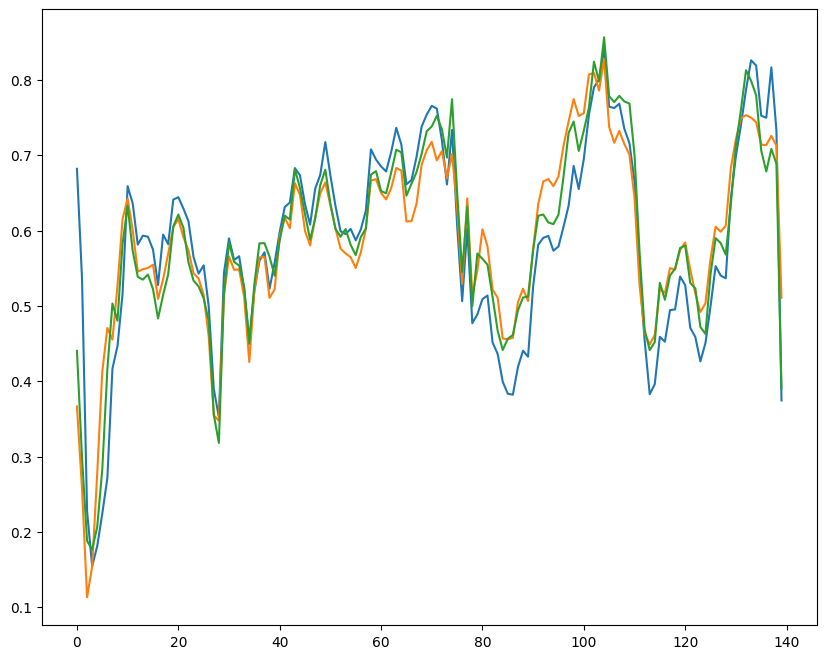

In [40]:
plt.plot(normal_test_data[0])
plt.plot(normal_test_data[1])
plt.plot(normal_test_data[2])

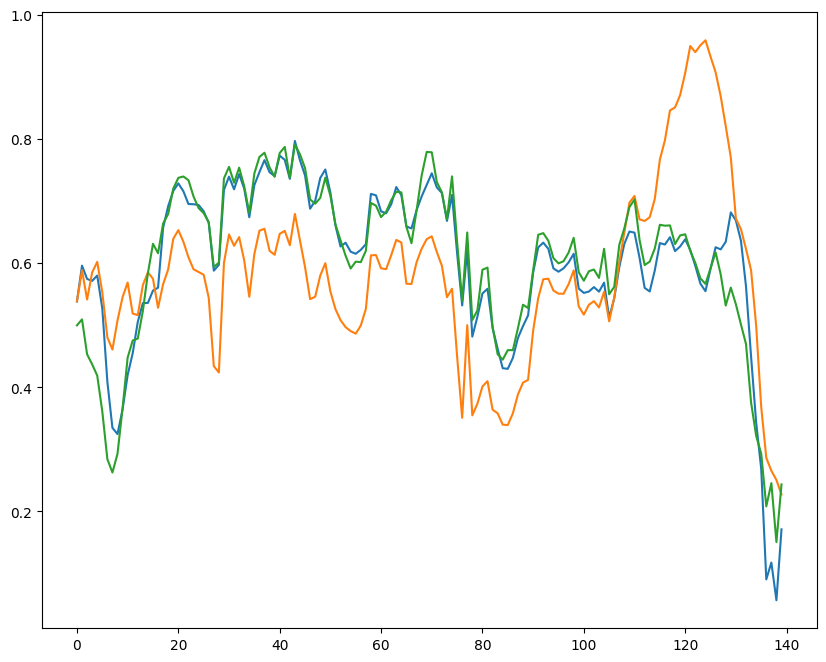

In [41]:
plt.plot(anamoly_train_data[0])
plt.plot(anamoly_train_data[1])
plt.plot(anamoly_train_data[2])

In [43]:
from keras import Sequential 

from keras.layers import Dense, LSTM

model = Sequential([
    Dense(64, activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(140,activation='sigmoid')
])

First, 64-32-16-8 (encoder) is downsampling ,
the second, 16-32-64-140 (docoder) is upsampling,

the model will try to reconstruct the patterns

since it's lossy , reconstruction error will occur 

The error will be high for ananmoly data.

In [63]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = tensorflow.keras.Sequential([
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu')
        ])
        
        self.decoder = tensorflow.keras.Sequential([
            Dense(16,activation='relu'),
            Dense(32,activation='relu'),
            Dense(64,activation='relu'),
            Dense(140,activation='sigmoid')
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded    

In [64]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=2)

model = AutoEncoder()
model.compile(optimizer='Adam', loss='mae')

In [65]:
history = model.fit(normal_train_data,normal_train_data,epochs=50, batch_size=64,validation_data=(train_scaled[:,1:] , train_scaled[:,1:]),
                    shuffle=True, callbacks=[es])

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1158 - val_loss: 0.0799
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0509 - val_loss: 0.0753
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 - val_loss: 0.0744
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0457 - val_loss: 0.0732
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0455 - val_loss: 0.0728
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0441 - val_loss: 0.0724
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453 - val_loss: 0.0716
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0440 - val_loss: 0.0688
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0393 - val_loss: 0.0623
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0374 - val_loss: 0.0593
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349 - val_loss: 0.0581
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0334 - val_lo

Since, training data is only normal data while validation data has normal as well as anamoly data, the loss will be very different

for normal Test data

In [66]:
encoder_out = model.encoder(normal_test_data).numpy()
encoder_out.shape, encoder_out

((586, 8),
 array([[5.712803 , 0.9337526, 0.       , ..., 0.       , 0.       ,
         3.0707333],
        [5.498621 , 1.2279848, 0.       , ..., 0.       , 0.       ,
         3.307718 ],
        [5.7013164, 1.147262 , 0.       , ..., 0.       , 0.       ,
         3.2333434],
        ...,
        [5.5685096, 1.0296217, 0.       , ..., 0.       , 0.       ,
         3.6275504],
        [6.0942106, 1.0033859, 0.       , ..., 0.       , 0.       ,
         3.0908985],
        [5.900199 , 1.0505098, 0.       , ..., 0.       , 0.       ,
         3.1674101]], dtype=float32))

In [67]:
decoder_out = model.decoder(encoder_out).numpy()
decoder_out.shape, decoder_out

((586, 140),
 array([[0.52007556, 0.39306775, 0.1899869 , ..., 0.6515246 , 0.60688543,
         0.3938763 ],
        [0.4688088 , 0.37212372, 0.20276138, ..., 0.68972635, 0.63520676,
         0.41879377],
        [0.49304423, 0.38169232, 0.19491899, ..., 0.6870572 , 0.63464034,
         0.41629174],
        ...,
        [0.4389905 , 0.3397587 , 0.17435318, ..., 0.6072663 , 0.56123734,
         0.33907017],
        [0.5415703 , 0.4036003 , 0.18456846, ..., 0.6907245 , 0.641278  ,
         0.41947517],
        [0.5176341 , 0.39148685, 0.18758477, ..., 0.6809923 , 0.63105184,
         0.41063777]], dtype=float32))

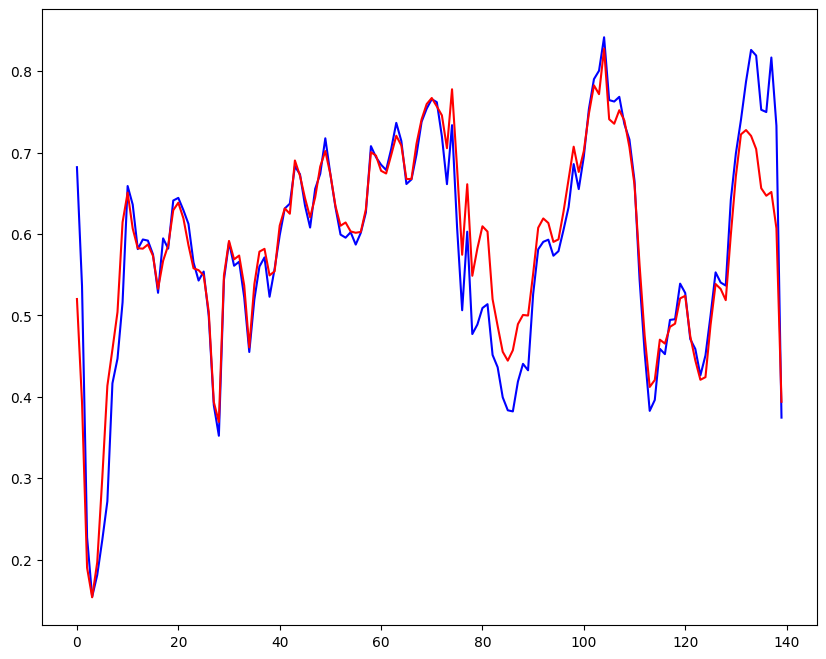

In [68]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

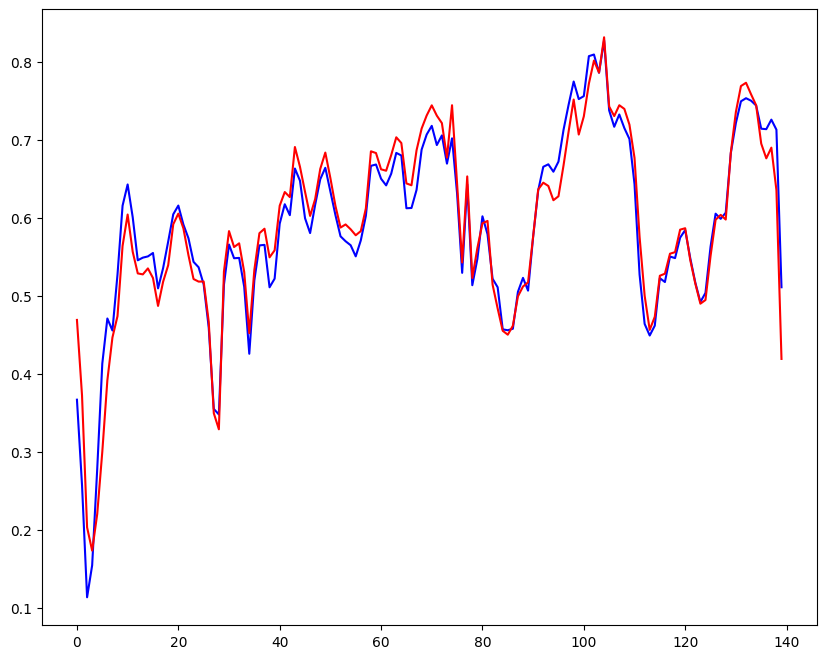

In [69]:
plt.plot(normal_test_data[1],'b')
plt.plot(decoder_out[1],'r')

For anamoly data

In [70]:
encoder_out_anamoly = model.encoder(anamoly_test_data).numpy()
decoder_out_anamoly = model.decoder(encoder_out_anamoly).numpy()

In [71]:
encoder_out_anamoly.shape, encoder_out_anamoly

((414, 8),
 array([[4.529074  , 1.5304657 , 0.        , ..., 0.        , 0.        ,
         3.424747  ],
        [4.746198  , 1.0975444 , 0.        , ..., 0.        , 0.        ,
         3.6077712 ],
        [3.72533   , 0.6926545 , 0.        , ..., 0.        , 0.        ,
         3.9903514 ],
        ...,
        [3.6802824 , 0.95755285, 0.        , ..., 0.        , 0.        ,
         3.977784  ],
        [4.060903  , 0.9398149 , 0.        , ..., 0.        , 0.        ,
         3.8622062 ],
        [3.201004  , 1.6292882 , 0.        , ..., 0.        , 0.        ,
         2.5960906 ]], dtype=float32))

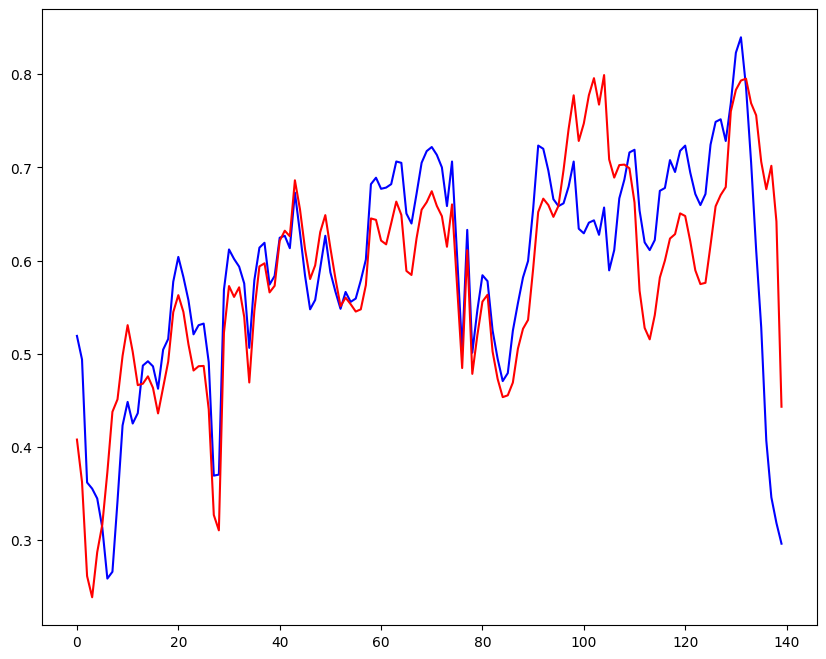

In [72]:
plt.plot(anamoly_test_data[0],'b')
plt.plot(decoder_out_anamoly[0],'r')

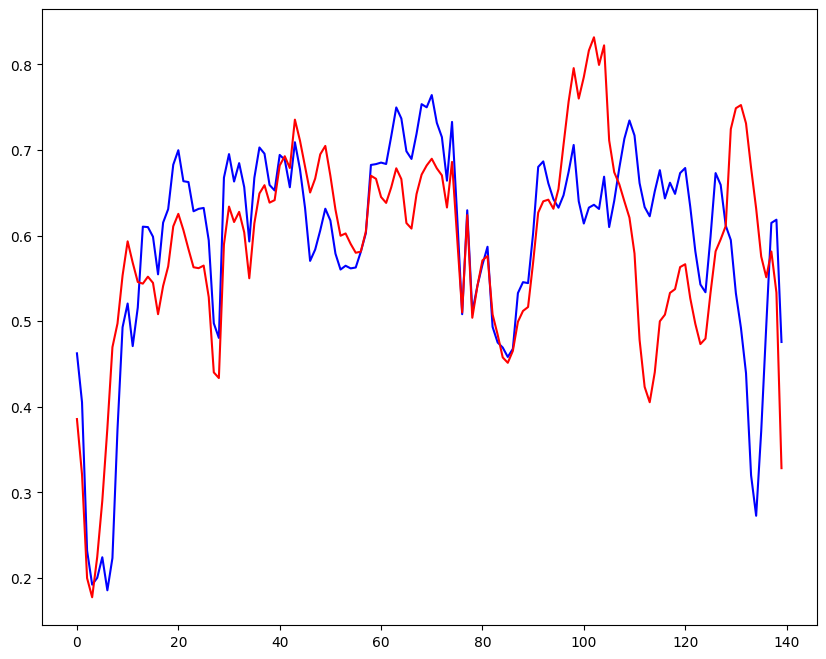

In [73]:
plt.plot(anamoly_test_data[1],'b')
plt.plot(decoder_out_anamoly[1],'r')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


(array([ 7., 29., 51., 54., 67., 57., 53., 42., 38., 29., 25., 24., 15.,
        17., 19.,  8., 12.,  7.,  5.,  6.,  3.,  3.,  1.,  2.,  1.,  1.,
         4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01174766, 0.01396902, 0.01619038, 0.01841174, 0.0206331 ,
        0.02285446, 0.02507582, 0.02729718, 0.02951854, 0.0317399 ,
        0.03396126, 0.03618261, 0.03840397, 0.04062533, 0.04284669,
        0.04506805, 0.04728941, 0.04951077, 0.05173213, 0.05395349,
        0.05617485, 0.05839621, 0.06061757, 0.06283893, 0.06506029,
        0.06728165, 0.06950301, 0.07172437, 0.07394573, 0.07616709,
        0.07838845, 0.08060981, 0.08283116, 0.08505252, 0.08727388,
        0.08949524, 0.0917166 , 0.09393796, 0.09615932, 0.09838068,
        0.10060204, 0.1028234 , 0.10504476, 0.10726612, 0.10948748,
        0.11170884, 0.1139302 , 0.11615156, 0.11837292, 0.12059428,
        0.12281564]),
 <BarContainer

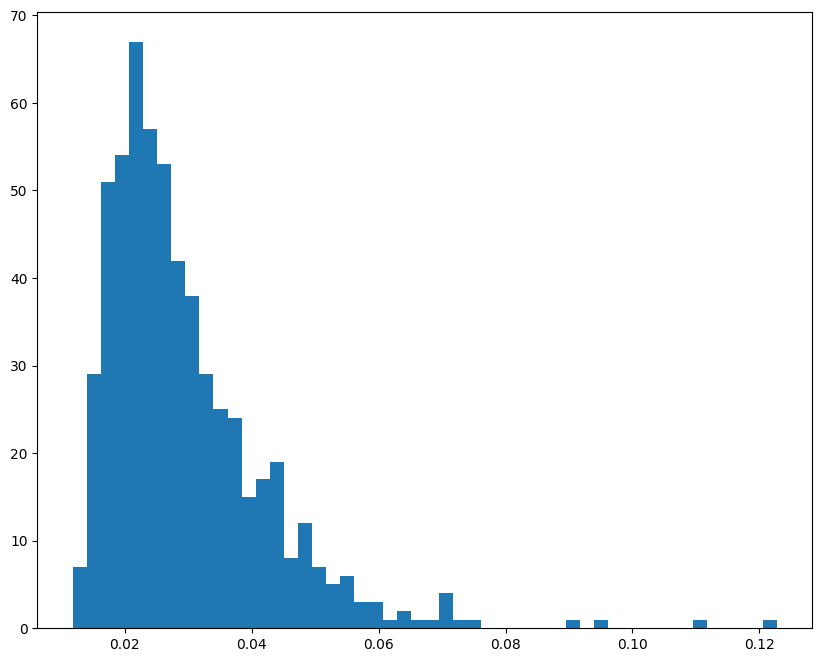

In [75]:
reconstructions = model.predict(normal_test_data)
train_loss = tensorflow.keras.losses.mae(reconstructions,normal_test_data)


plt.hist(train_loss , bins=50)

In [76]:
threshold = np.mean(train_loss) + 2* np.std(train_loss) 

In [77]:
threshold

0.05571723450648709

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         9.,  3.,  8., 12., 21., 35., 39., 47., 51., 54., 41., 40., 20.,
         9.,  7.,  1.,  0.,  1.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.02279303, 0.0259354 , 0.02907777, 0.03222015, 0.03536252,
        0.03850489, 0.04164727, 0.04478964, 0.04793201, 0.05107439,
        0.05421676, 0.05735913, 0.06050151, 0.06364388, 0.06678625,
        0.06992863, 0.073071  , 0.07621338, 0.07935575, 0.08249812,
        0.0856405 , 0.08878287, 0.09192524, 0.09506762, 0.09820999,
        0.10135236, 0.10449474, 0.10763711, 0.11077948, 0.11392186,
        0.11706423, 0.1202066 , 0.12334898, 0.12649135, 0.12963372,
        0.1327761 , 0.13591847, 0.13906084, 0.14220322, 0.14534559,
        0.14848797, 0.15163034, 0.15477271, 0.15791509, 0.16105746,
        0.16419983, 0.16734221, 0.17048458, 0.17362695, 0.17676933,
        0.1799117 ]),
 <BarContainer

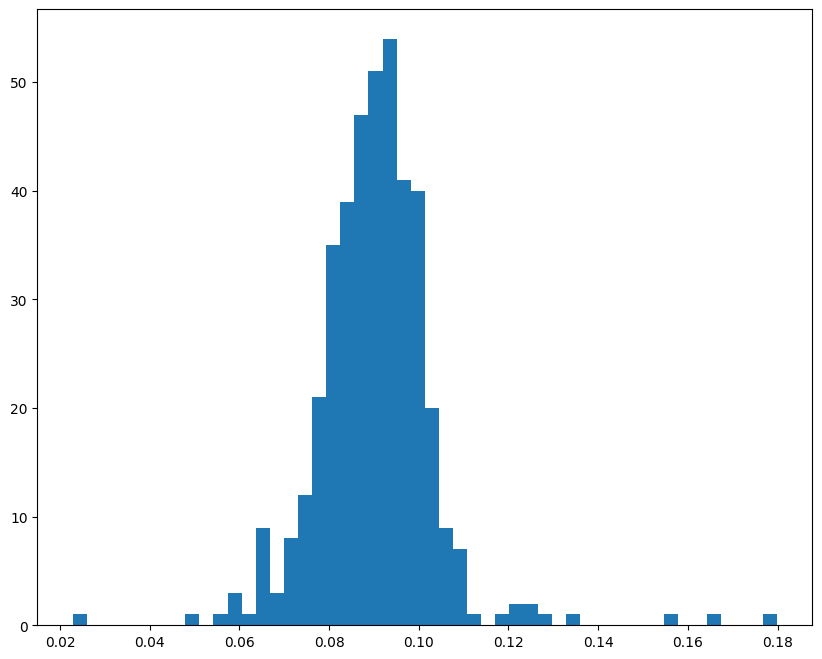

In [78]:
reconstructions2 = model.predict(anamoly_test_data)
anamoly_loss = tensorflow.keras.losses.mae(reconstructions2,anamoly_test_data)

plt.hist(anamoly_loss , bins=50)

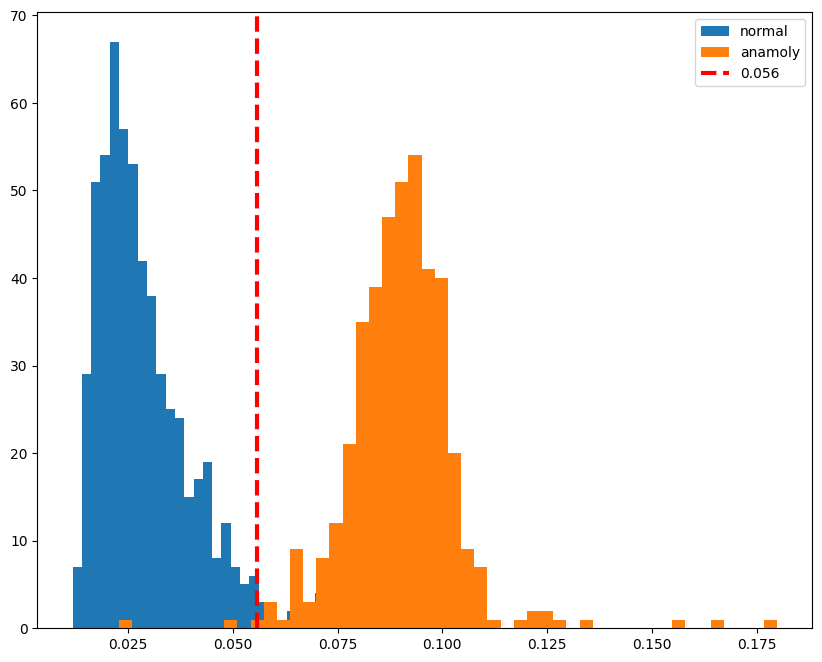

In [80]:
plt.hist(train_loss, bins=50,label='normal')
plt.hist(anamoly_loss, bins=50, label='anamoly')
plt.axvline(threshold, color='r',linewidth=3,linestyle ='dashed', label='{:.3f}'.format(threshold))
plt.legend(loc='best')
plt.show()

In [82]:
np.mean(anamoly_loss) , np.std(anamoly_loss)

(0.09023715079527549, 0.013299277334190169)

In [83]:
tensorflow.math.less(train_loss,threshold)

<tf.Tensor: shape=(586,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [84]:
preds = tensorflow.math.less(train_loss, threshold)


In [86]:
preds.shape, tensorflow.math.count_nonzero(preds)

(TensorShape([586]), <tf.Tensor: shape=(), dtype=int64, numpy=564>)

In [87]:
anamoly_preds = tensorflow.math.greater(anamoly_loss,threshold)
anamoly_preds.shape, tensorflow.math.count_nonzero(anamoly_preds)

(TensorShape([414]), <tf.Tensor: shape=(), dtype=int64, numpy=412>)